# Figure 1: del Molino et al, eLife 2017

This is a reproduction of del Molino et al. 2017 using NeuroML2/LEMS


## Microcircuit Conenctivity

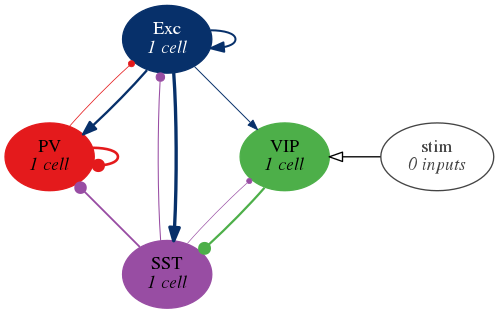

In [1]:
from IPython.display import Image
Image("../NeuroML/Fig1/Fig1a.png")

In [9]:
populations = ['e', 'pv', 'sst', 'vip']
colours = ['blue', 'red', 'darkorchid', 'green']

## Low Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading: Data loaded from ./rates_low.dat (jNeuroML)


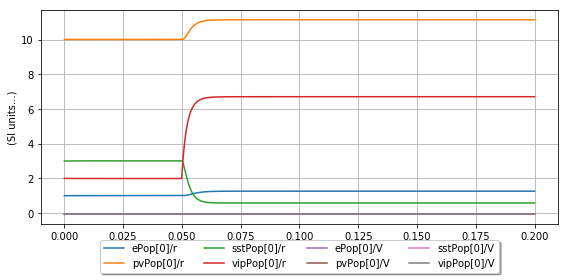

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=True)

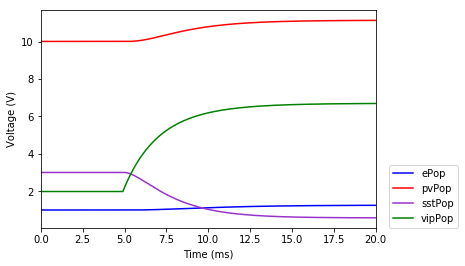

In [18]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(low_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in low_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, low_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## High Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_high_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading: Data loaded from ./rates_high.dat (jNeuroML)


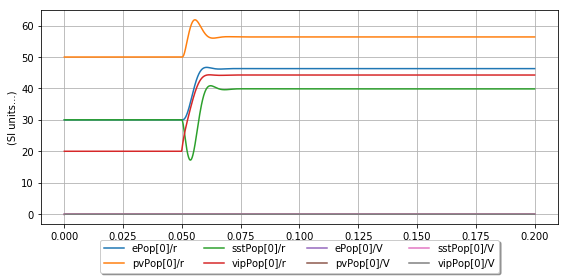

In [5]:
high_lems_file='../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml'
high_results = pynml.run_lems_with_jneuroml(high_lems_file, nogui=True, load_saved_data=True, plot=True)

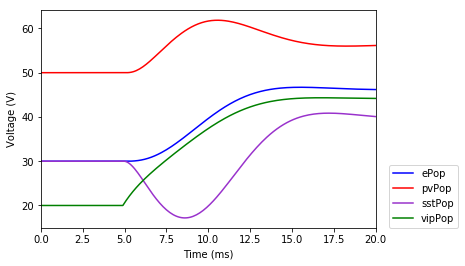

In [20]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(high_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in high_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, high_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## f-I Curve

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_e.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_e.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./fI_e.dat after having loading its data!
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./rates_low.dat after having loading its data!

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_pv.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_pv.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Removing file ./fI_pv.dat after having loading its data!
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBase

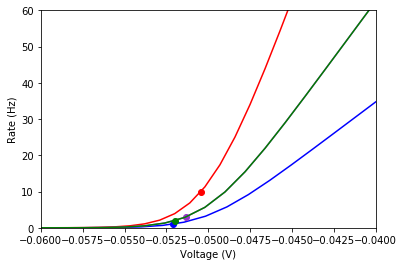

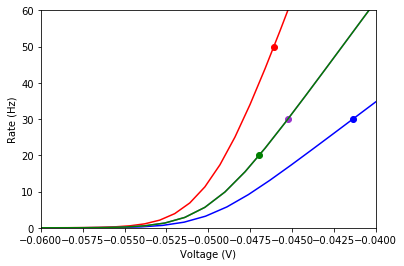

In [31]:
import numpy as np
n_units = 20
baselines = ['low', 'high']

r = {}
v = {}
for baseline in baselines:
    plt.figure()
    for population_idx, population in enumerate(populations):
        lems_file = '../NeuroML/Fig2/LEMS_fISim_%s.xml' %population
        # Run simulation
        # cleanup: remove the .dat file after loading them
        results = pynml.run_lems_with_jneuroml(lems_file, nogui=True, load_saved_data=True, cleanup=True)
        # get the last values of the simulation and plot the fI Curve

        r[population] = np.zeros((n_units))
        v[population] = np.zeros((n_units))
        for unit in range(n_units):
            pop_unit_r = '%sPop[%d]/r' %(population, unit)
            pop_unit_V = '%sPop[%d]/V' %(population, unit)
            r[population][unit] = results[pop_unit_r][-1]
            v[population][unit] = results[pop_unit_V][-1]

        plt.plot(v[population], r[population], color=colours[population_idx])

        # load the low_baseline results and plot them on the fI curve
        baseline_lems = '../NeuroML/Fig1/LEMS_RateBased_%s_baseline.xml' %baseline
        results_baseline = pynml.run_lems_with_jneuroml(baseline_lems, nogui=True, load_saved_data=True, cleanup=True)
        population_v = '%sPop[0]/V' %population
        population_r = '%sPop[0]/r' %population
        # Note: I am taking the first time point as at time point 0 the membrane voltage has not yet reached the baseline
        #  activity steady-state
        plt.plot(results_baseline[population_v][1], results_baseline[population_r][1], 'o', color=colours[population_idx])
        print('')

        plt.xlabel('Voltage (V)')
        plt.ylabel('Rate (Hz)')
        plt.xlim(-.060, -.040)
        plt.ylim(0, 60)
        plot_name = 'fI_%s_baseline.png' %baseline